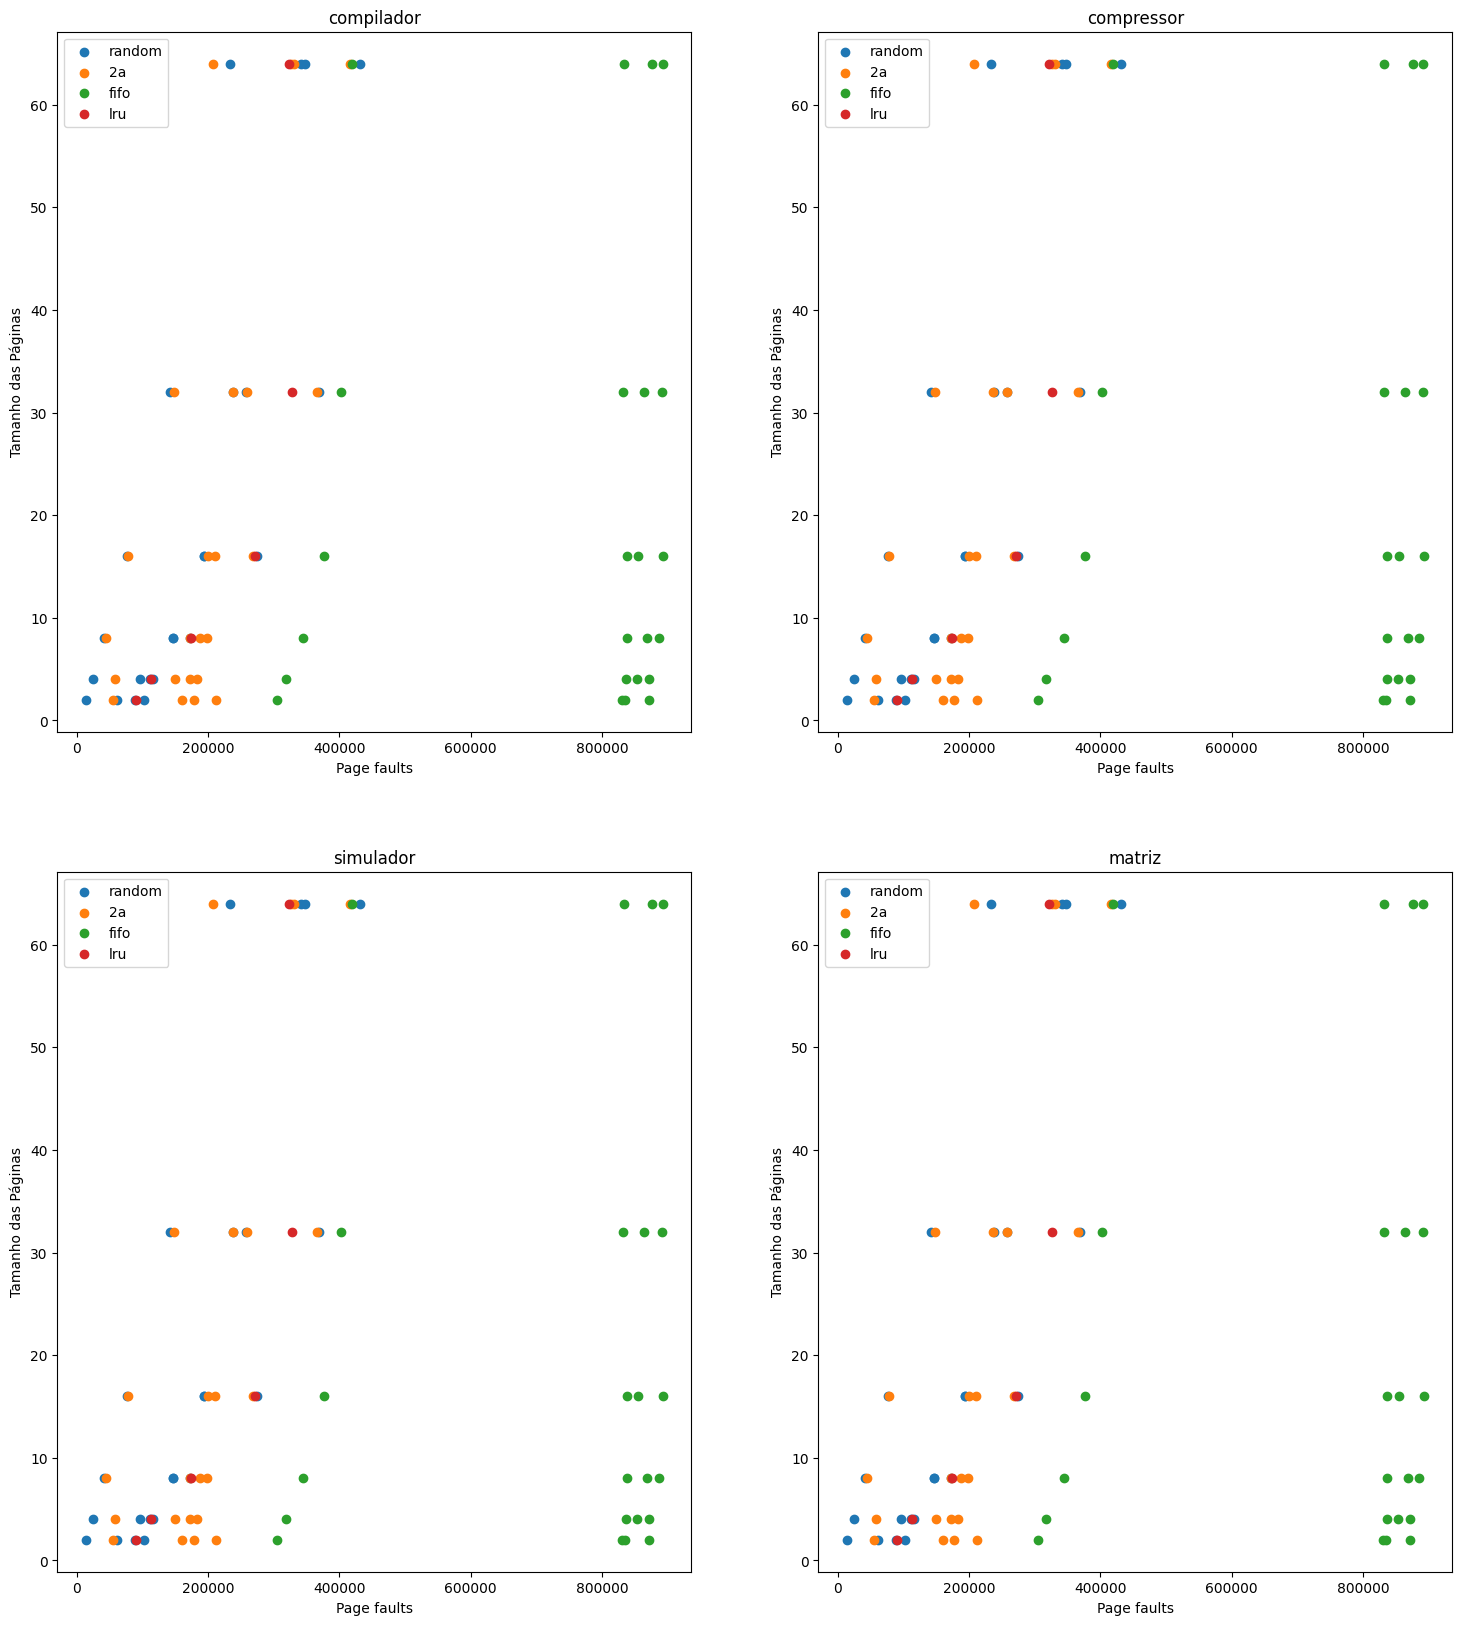

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from os.path import join


plt.rcParams['figure.figsize'] = (18, 20)


def log_parser(caminho_arquivo) -> dict:
    res = {}

    with open(caminho_arquivo, 'r') as f:
        linhas = f.readlines()
        
    # Remove a primeira linha
    linhas = linhas[1:]
    
    # Extrai o conteúdo após ":"
    for linha in linhas:
        indice, resultado = linha.split(":", 1)
        indice = indice.strip()
        dado = resultado.strip()

        res[indice] = dado

    return res

diretorio = './logs'

# Lista todos os arquivos no subdiretório
arquivos = listdir(diretorio)

r = []

# Itera sobre cada arquivo
for arquivo in arquivos:
    caminho_arquivo = join(diretorio, arquivo)
    r.append(log_parser(caminho_arquivo))

    

df = pd.DataFrame(r)

df = df.dropna()

df['Tamanho da memória usada'] = df['Tamanho da memória usada'].str[:-2].astype(int)
df['Tamanho das Páginas'] = df['Tamanho das Páginas'].str[:-2].astype(int)

df['Arquivo de entrada'] = df['Arquivo de entrada'].str[7:-4]
df['Page faults'] = df['Page faults'].astype(int)


arquivos_entrada = df['Arquivo de entrada'].unique()
algoritmos = df['Técnica de reposição'].unique()

fig, axs = plt.subplots(2, 2)

# Iterar sobre os arquivos de entrada e plotar gráficos separados 
for i, arquivo in enumerate(arquivos_entrada):

    df_arquivo = df[df['Arquivo de entrada'] == arquivo]
    ax = axs[i // 2, i % 2]  # Selecionar o subplot correspondente
    
    for j, alg in enumerate(algoritmos):
        df_arquivo = df[df['Técnica de reposição'] == alg]

        ax.scatter(df_arquivo['Page faults'], df_arquivo['Tamanho das Páginas'], label=alg)

    
    ax.set_xlabel('Page faults')
    ax.set_ylabel('Tamanho das Páginas')
    ax.set_title(arquivo)
    ax.legend()

# Exibir os gráficos
plt.savefig("./logs/result.png")